In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
path = r"/kaggle/input/brain-tumor-mri-dataset"

In [5]:
print(os.listdir(path))

['Training', 'Testing']


In [6]:
df_train = os.path.join(path ,'Training')
df_test = os.path.join(path, 'Testing')

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix 

In [9]:
img_size = 224
bat_size = 32

In [11]:
train_generator = tf.keras.utils.image_dataset_from_directory(
    df_train,
    labels="inferred",
    image_size=(img_size, img_size),
    batch_size=bat_size,
    color_mode="grayscale",
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=42
)

classes = train_generator.class_names
print(f"{classes}")


Found 5712 files belonging to 4 classes.
Using 4570 files for training.
['glioma', 'meningioma', 'notumor', 'pituitary']


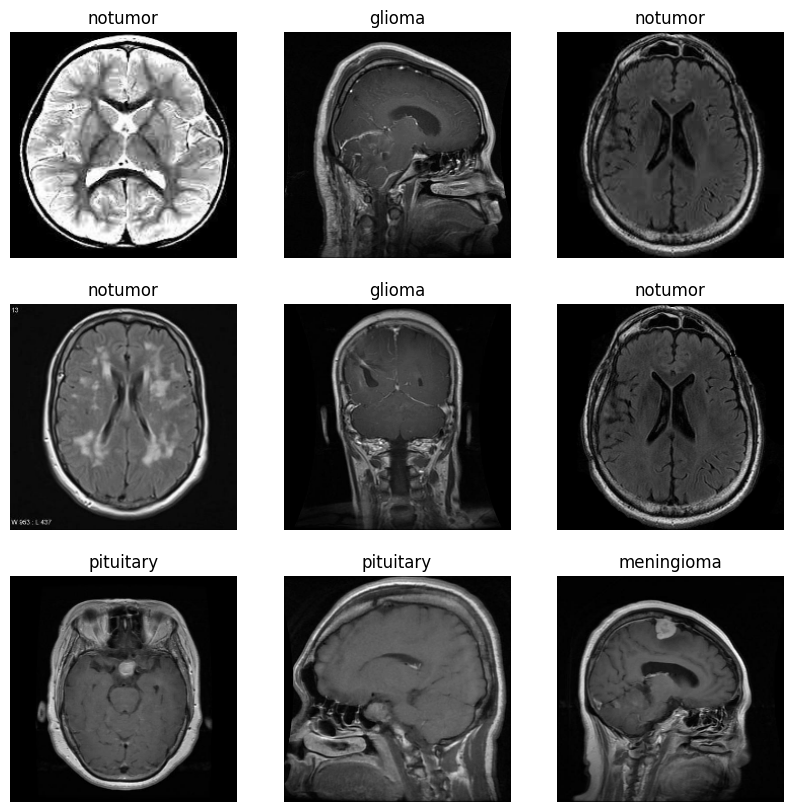

In [12]:
plt.figure(figsize=(10, 10))
for images , labels in train_generator.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8') , cmap = 'gray')
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.show()

In [13]:
validation_generator = tf.keras.utils.image_dataset_from_directory(
    df_train,
    labels="inferred",
    image_size=(img_size, img_size),
    batch_size=bat_size,
    color_mode="grayscale",
    validation_split=0.2,
    subset="validation",
    seed=42
)

test_generator = tf.keras.utils.image_dataset_from_directory(
        df_test , 
        labels = "inferred",
        image_size=(img_size, img_size),
        batch_size=bat_size,
        color_mode='grayscale'
)

Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [14]:
train_generator = train_generator.map(lambda x,y : (x/255,y))
validation_generator = validation_generator.map(lambda x,y : (x/255,y))
test_generator = test_generator.map(lambda x,y : (x/255,y))

In [16]:
model = Sequential([
    Conv2D(32 , (3,3) , activation = 'relu' , input_shape = (img_size, img_size, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64 , (3,3) , activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Conv2D(128 , (3,3) , activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(256 , (3,3) , activation = 'relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
    
])


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 222, 222, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       4,718,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,107,076 (19.48 MB)

 Trainable params: 5,107,076 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

In [18]:
epochs = 15

model.fit(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator
    )

Epoch 1/15


I0000 00:00:1750368053.719360     413 service.cc:148] XLA service 0x7b8d04001360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750368053.719395     413 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750368053.719400     413 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750368054.015133     413 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/143 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.2847 - loss: 1.4481

I0000 00:00:1750368059.578692     413 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


143/143 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.5622 - loss: 0.9994 - val_accuracy: 0.7566 - val_loss: 0.5972
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.8373 - loss: 0.4348 - val_accuracy: 0.8774 - val_loss: 0.3330
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.8703 - loss: 0.3207 - val_accuracy: 0.8905 - val_loss: 0.2916
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.9124 - loss: 0.2352 - val_accuracy: 0.8792 - val_loss: 0.3353
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9322 - loss: 0.1859 - val_accuracy: 0.9081 - val_loss: 0.2867
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9466 - loss: 0.1463 - val_accuracy: 0.9308 - val_loss: 0.2514
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9603 - loss: 0.1041 - val_accuracy: 0.9387 - val_loss: 0.2580
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9743 - loss: 0.0717 - val_accuracy: 0.9

In [19]:
loss , accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9322 - loss: 0.4485
Test Loss: 0.4126904010772705, Test Accuracy: 0.9344012141227722


In [20]:
y_true = []
images = []
for image, label in test_generator:
    y_true.extend(label.numpy())
    images.extend(image.numpy())

In [21]:
y_pred = model.predict(np.array(images))


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [22]:
y_pred = np.argmax(y_pred, axis=1)

<Axes: >

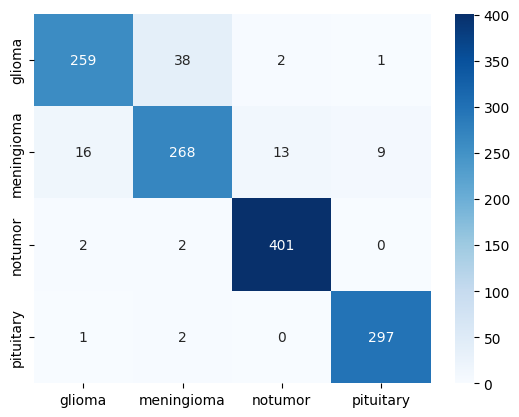

In [23]:
sns.heatmap(confusion_matrix(y_true, y_pred) , annot=True, fmt='d', cmap='Blues',xticklabels=classes, yticklabels=classes)

In [24]:
print(classification_report(y_true, y_pred, target_names=classes))

              precision    recall  f1-score   support

      glioma       0.93      0.86      0.90       300
  meningioma       0.86      0.88      0.87       306
     notumor       0.96      0.99      0.98       405
   pituitary       0.97      0.99      0.98       300

    accuracy                           0.93      1311
   macro avg       0.93      0.93      0.93      1311
weighted avg       0.93      0.93      0.93      1311



In [25]:
img_path = r"/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0000.jpg"

In [26]:
def prediction(img_path):
    img = tf.keras.utils.load_img(img_path, color_mode='grayscale', target_size=(img_size, img_size))
    img = tf.keras.utils.img_to_array(img)
    img = np.expand_dims(img, axis=0) / 255.0
    predictions = model.predict(img)
    predicted_class = np.argmax(predictions[0])
    print(f"Predicted probabilities: {np.max(predictions[0])*100:.2f}% for {classes[predicted_class]}")

In [27]:
prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
Predicted probabilities: 99.91% for glioma
